### Exploración y predicción del dataset Diabetes

Hacemos las importaciones de librerias

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score

from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline

Posteriormente cargamos el CSV de Diabetes y definimos la cantidad de datos en el train y en el test

In [19]:
# Cargar los datos
df = pd.read_csv('Diabetes.csv')

# Dividir los datos en características (X) y etiquetas (y)
X = df.drop('Outcome', axis=1)
y = df['Outcome']


### Exploración

Visualización de las clases para obtener los resultados de las personas con o sin diabetes

c:\Users\rolbi\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\rolbi\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\rolbi\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


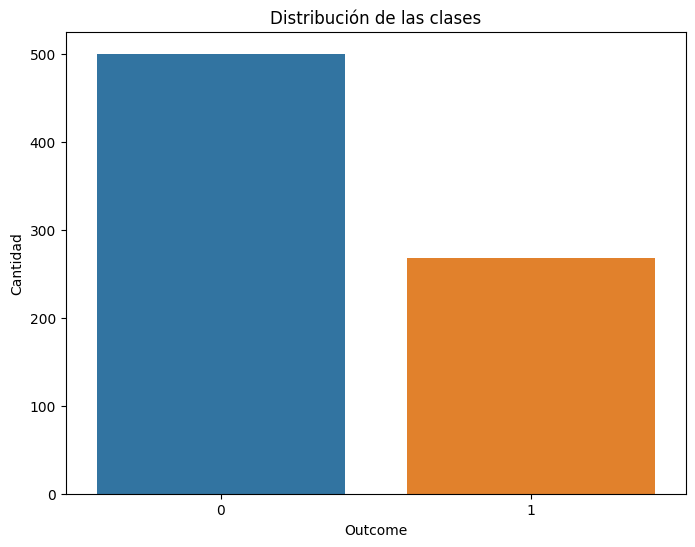

In [20]:
# Visualización de la distribución de las clases
plt.figure(figsize=(8, 6))
sns.countplot(x='Outcome', data=df)
plt.title('Distribución de las clases')
plt.xlabel('Outcome')
plt.ylabel('Cantidad')
plt.show()

Algunos resultados no incluyen el campo de insulina que es importante para la predicción. Se requiere hacer una transformación de los datos.

In [21]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### Obtenemos el train y el test data

In [22]:
# Submuestreo: Definirles la media a los datos con Outcome igual a 0
X_train_0 = X[y == 0].sample(n=sum(y == 1), random_state=42)
X_train_1 = X[y == 1]
y_train_0 = pd.Series([0] * len(X_train_0), name='Outcome')
y_train_1 = pd.Series([1] * len(X_train_1), name='Outcome')

# Unir los datos de entrenamiento balanceados
X_train_balanced = pd.concat([X_train_0, X_train_1])
y_train_balanced = pd.concat([y_train_0, y_train_1])

# Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_train_balanced, y_train_balanced, test_size=0.2, random_state=42)

# Normalizar los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Regresión Logistica

In [23]:
# Crear el modelo de regresión logística
model = LogisticRegression(max_iter=1000, random_state=0)

# Entrenar el modelo con los datos de entrenamiento
model.fit(X_train, y_train)

# Predecir las etiquetas para los datos de entrenamiento y prueba
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calcular la precisión del modelo en los conjuntos de entrenamiento y prueba
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)

# Imprimir métricas de evaluación
print("Accuracy:", test_accuracy)
print("Precision:", test_precision)
print("Recall:", test_recall)

Accuracy: 0.7777777777777778
Precision: 0.7450980392156863
Recall: 0.7755102040816326


### KNN

In [24]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

# Calcular la precisión del modelo en los conjuntos de entrenamiento y prueba
test_accuracy = accuracy_score(y_test, y_pred)
test_precision = precision_score(y_test, y_pred)
test_recall = recall_score(y_test, y_pred)

# Imprimir métricas de evaluación
print("Accuracy:", test_accuracy)
print("Precision:", test_precision)
print("Recall:", test_recall)

Accuracy: 0.75
Precision: 0.72
Recall: 0.7346938775510204


### Redes Neuronales

In [28]:
# Hiperparámetros
hidden_layer_sizes = (100, 100, 100)
batch_size = 64
learning_rate_init = 0.001
max_iter = 10
random_state = 42

# Entrenar el modelo MLPClassifier
model = MLPClassifier(hidden_layer_sizes=hidden_layer_sizes,
                      batch_size=batch_size,
                      learning_rate_init=learning_rate_init,
                      max_iter=max_iter,
                      random_state=random_state)
model.fit(X_train_scaled, y_train)

# Realizar predicciones
y_pred = model.predict(X_test_scaled)

# Calcular métricas de evaluación
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

# Imprimir métricas de evaluación
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.7962962962962963
Precision: 0.7547169811320755
Recall: 0.8163265306122449


c:\Users\rolbi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
